<a href="https://www.kaggle.com/code/aravindnagarajan/multi-class-obesity?scriptVersionId=195971666" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Problem Statement

The dataset provided is related to obesity classification, where the goal is to predict the obesity level of individuals based on various features. The target variable, `NObeyesdad`, represents different obesity levels, making it a multi-class classification problem. The features include various health and lifestyle indicators such as history with overweight, physical activity, and dietary habits.

### Multi-Class Classification

Multi-class classification involves categorizing instances into one of three or more classes. Unlike binary classification, which deals with two classes, multi-class classification requires algorithms that can handle multiple categories. Common strategies include:

- **One-vs-Rest (OvR)**: This strategy involves training one classifier per class, with the samples of that class as positive samples and all other samples as negatives.
- **One-vs-One (OvO)**: This involves training a classifier for every pair of classes, which can be computationally intensive for datasets with many classes.

### Random Forest Classifier

The Random Forest classifier is an ensemble learning method primarily used for classification and regression. It operates by constructing multiple decision trees during training and outputting the mode of the classes (classification) or mean prediction (regression) of the individual trees. Key characteristics include:

- **Ensemble Method**: Combines multiple models to improve performance and reduce overfitting.
- **Bootstrap Aggregation (Bagging)**: Each tree is trained on a random subset of the data, enhancing diversity among trees.
- **Feature Randomness**: At each split in the tree, a random subset of features is considered, which helps in reducing correlation among trees.

### Procedure

1. **Data Preparation**:
   - Load the dataset and inspect the features and target variable.
   - Preprocess the data if necessary (e.g., handling missing values, scaling).

2. **Train-Test Split**:
   - Divide the dataset into training and testing sets to evaluate the model's performance.

3. **Model Selection**:
   - Choose the Random Forest Classifier for its robustness and ability to handle multi-class problems.

4. **Training**:
   - Fit the model to the training data using the `fit` method.

5. **Prediction**:
   - Use the trained model to predict the classes of the test data.

6. **Evaluation**:
   - Evaluate the model using metrics like accuracy, classification report, and confusion matrix to understand the performance across different classes.

7. **Visualization**:
   - Plot a confusion matrix to visually assess the model's performance and identify any misclassifications.


## Multi Class Classification

In [1]:
import pandas as pd

### Dataset Definition

In [2]:
obesity_file_path = '/kaggle/input/obesity-risk-prediction-cleaned/estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.csv'

obesity_data = pd.read_csv(obesity_file_path)

obesity_data.describe()


,Height,Weight,family_history_with_overweight,SCC,MTRANS_Walking,FAVC_z,FCVC_minmax,NCP_z,CAEC_minmax,CH2O_minmax,FAF_minmax,TUE_z,CALC_z,Age_bin_minmax,NObeyesdad
count,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000
mean,1.702045,86.622985,0.817354,0.045062,0.026366,0.639326,0.709818,0.763670,0.379834,0.504361,0.337873,0.843202,0.855417,0.499760,3.110259
std,0.093419,26.256245,0.386469,0.207491,0.160260,0.769120,0.267493,0.645761,0.155956,0.306578,0.283687,0.537726,0.518064,0.353723,1.993832
min,1.450000,39.000000,0.000000,0.000000,0.000000,0.361418,0.000000,0.002375,0.000000,0.000000,0.000000,0.000146,0.516552,0.000000,0.000000
25%,1.630000,65.130595,1.000000,0.000000,0.000000,0.361418,0.500000,0.404704,0.333333,0.291005,0.042901,0.466622,0.516552,0.250000,1.000000
50%,1.701383,83.000000,1.000000,0.000000,0.000000,0.361418,0.695087,0.404704,0.333333,0.500000,0.333333,0.813973,0.516552,0.500000,3.000000
75%,1.768770,108.009452,1.000000,0.000000,0.000000,0.361418,1.000000,1.031717,0.333333,0.740243,0.557356,1.092724,1.439033,0.750000,5.000000
max,1.980000,165.057269,1.000000,1.000000,1.000000,2.766876,1.000000,2.164116,1.000000,1.000000,1.000000,2.194694,4.427721,1.000000,6.000000


### Train-Test Split

In [3]:
from sklearn.model_selection import train_test_split

X = obesity_data.drop('NObeyesdad', axis=1)
y = obesity_data['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Random Forest Classifier

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

### Evaluation

Accuracy: 0.9641148325358851
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.88      0.95      0.91        66
           2       0.95      0.93      0.94        56
           3       0.96      0.94      0.95        48
           4       1.00      0.96      0.98        71
           5       1.00      1.00      1.00        67
           6       1.00      1.00      1.00        56

    accuracy                           0.96       418
   macro avg       0.97      0.96      0.96       418
weighted avg       0.97      0.96      0.96       418



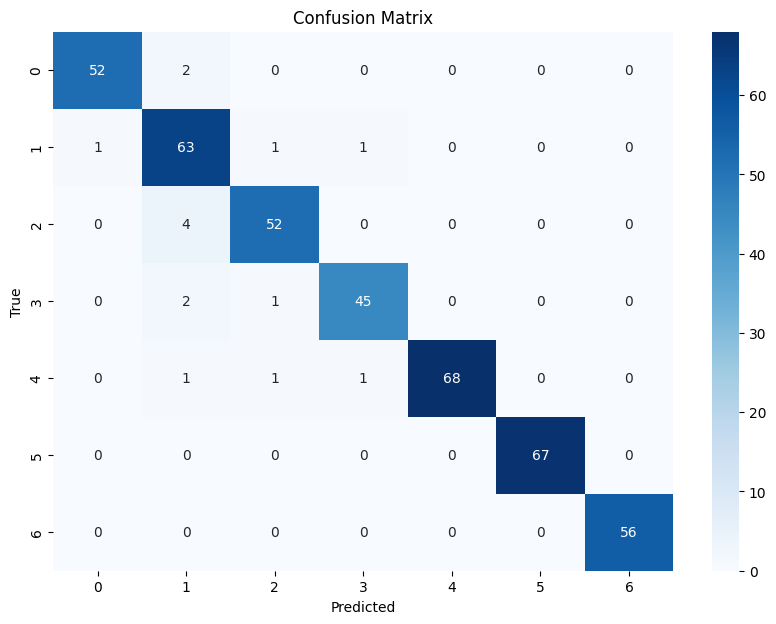

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()